In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats

In this notebook we consider fitting the data with circular Gaussian, vs
elliptical Gaussian.

We then try to compare the two models and assign the significance to these two
these model fits.

We use the fact that the log-likelihood difference (under the the null hypothesis)
should have chi-square distribution

Model generation

In [3]:
def gendata(npt, size=2, axis_ratio=1):
    # generate the gaussian data with possibly unequal axis ratio
    x = np.random.normal(0, size, size=npt)
    y = np.random.normal(0, size * axis_ratio, size=npt)
    return x,y

Data from a circular Gaussian distribution

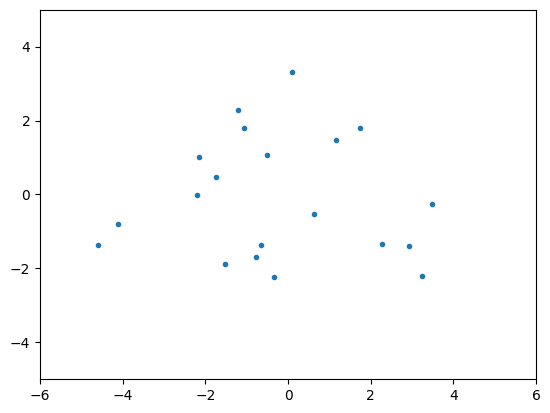

In [4]:
np.random.seed(1)
X,Y=gendata(20,axis_ratio=1)
plt.plot(X,Y,'.');
plt.xlim(-6,6);
plt.ylim(-5,5);

Data from elliptical distribution

(-5.0, 5.0)

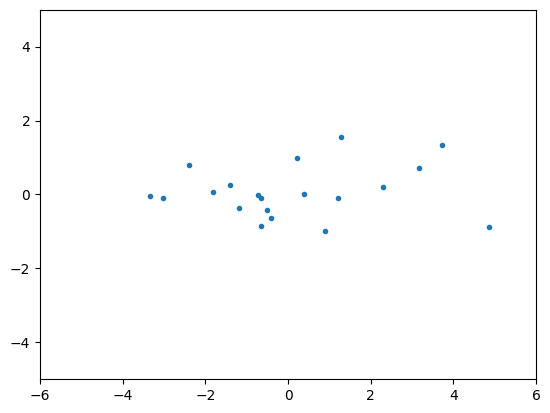

In [5]:
np.random.seed(5)
X,Y=gendata(20,axis_ratio=0.5)
plt.plot(X,Y,'.');plt.xlim(-6,6);plt.ylim(-5,5)

Likelihod functions for circular and elliptical models

In [6]:
def like_gau(p, data):
    # loglikelihood of the Gaussian model
    x, y = data
    x0, y0, size = p # parameters are centers of the gaussian and size
    if size <= 0:
        return 1e30
    loglike = (scipy.stats.norm(x0, size).logpdf(x)+
        scipy.stats.norm(y0, size).logpdf(y))
    return -loglike.sum()

def like_gau_ell(p, data):
    # log-likelihood of the elliptical gaussian model
    x,y = data
    x0, y0, size, axis_ratio = p # parameters are centers of the gaussian and size
    if size <= 0:
        return 1e30
    loglike = (scipy.stats.norm(x0, size).logpdf(x)+
        scipy.stats.norm(y0, size*axis_ratio).logpdf(y))
    return -loglike.sum()

Code that fits a specified model to the data

In [7]:
def runfit(data, model):
    # run ML fit of the model to the data and return the
    # minus log-likelihood
    if model == 'gau':
        like = like_gau
        p0 = [1, 1, 5] # starting point
    if model == 'gau_ell':
        like = like_gau_ell
        p0 = [1, 1, 5, 1] # starting point
    ret= scipy.optimize.minimize(like, p0, jac=False, args=(data,))
                                #method='Nelder-Mead')
    return ret['fun']


In [8]:
# Generate random data from Circular model
npt = 50
nit = 100
dlogls = np.zeros(nit)
for i in range(nit):
    # generate random circular datasets
    datac = gendata(npt, size=2, axis_ratio=1)
    # fit the data by circular and elliptical models
    logl0 = -2 * runfit(datac, 'gau')
    logl1 = -2 * runfit(datac, 'gau_ell')
    # save -2*log(L0/L1)
    dlogls[i] = logl1 - logl0

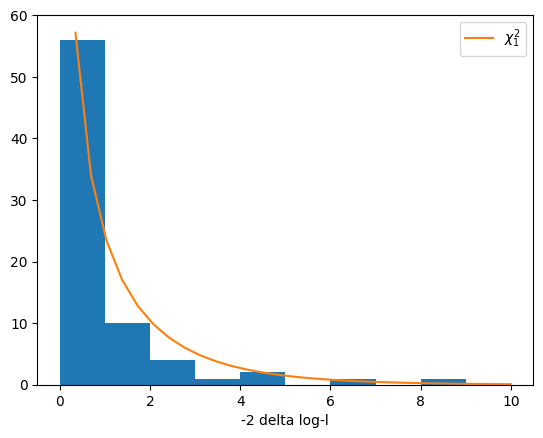

In [9]:
# plot the histogram of -2*(delta log-l)
plt.hist(dlogls,bins=10,range=[0,10]);
plt.xlabel('-2 delta log-l')
# overplot the chi-square distribution
xgrid = np.linspace(0,10,30)
plt.plot(xgrid,scipy.stats.chi2(1).pdf(xgrid)*nit, label='$\chi^2_1$')
plt.legend()

We look at elliptical data

In [10]:
npt = 50
nit = 100
dlogls2 = []
for i in range(nit):
    datac = gendata(npt, size=2, axis_ratio=2)
    # fit the elliptical data
    logl0 = -2 * runfit(datac, 'gau')
    logl1 = -2 * runfit(datac, 'gau_ell')
    dlogls2.append(logl1 - logl0)

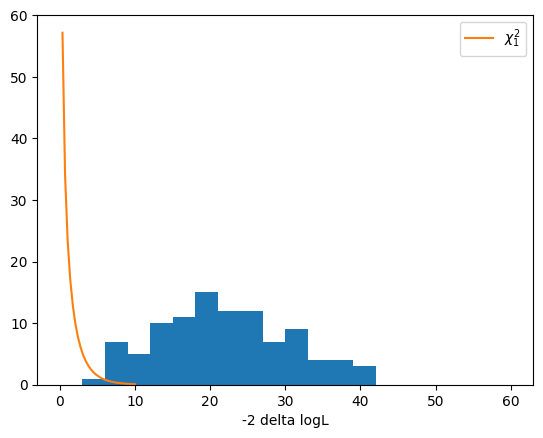

In [11]:
plt.hist(dlogls2,bins=20,range=[0,60]);
plt.plot(xgrid,scipy.stats.chi2(1).pdf(xgrid)*nit, label='$\chi^2_1$')
plt.xlabel('-2 delta logL');
plt.legend();